In [7]:
!pip install -U -q google-generativeai


This project builds an AI-powered emotion-aware diary to help individuals reflect on their feelings. By analyzing their diary entries, the AI detects emotions, summarizes the text, and offers emotional feedback.

In [8]:
import google.generativeai as genai
print(genai.__version__)


0.8.5


Fetching the google API Key.

In [37]:
from kaggle_secrets import UserSecretsClient
import google.generativeai as genai

# Fetch secret
user_secrets = UserSecretsClient()

try:
    secret_value_0 = user_secrets.get_secret("GOOGLE_API_KEY")
    print("✅ API Key successfully fetched.")
except Exception as e:
    print("❌ Failed to fetch API Key:", e)
    raise

# Configure the API key
try:
    genai.configure(api_key=secret_value_0)
    print("✅ genai configured successfully.")
except Exception as e:
    print("❌ Failed to configure genai:", e)
    raise





✅ API Key successfully fetched.
✅ genai configured successfully.


Selecting the model gemini-1.5-pro-002,part of the Gemini series, which focuses on language understanding and content generation.

In [31]:
try:
    model = genai.GenerativeModel("gemini-1.5-pro-002")
    response = model.generate_content("Hello Gemini from Kaggle!")
    print("✅ Response received:\n", response.text)
except Exception as e:
    print("❌ Failed to generate content:", e)
    raise

✅ Response received:
 Hello!  It's nice to "meet" you too! How can I help you today? Are you working on a Kaggle competition, exploring datasets, or something else?  I'm ready to assist with various tasks, including:

* **Code generation (Python, R, etc.)**:  Need help with data preprocessing, model building, or visualization?
* **Explaining concepts**:  Confused about a specific machine learning algorithm or statistical technique?
* **Brainstorming ideas**: Stuck on a problem? Let's explore potential solutions together.
* **Finding relevant Kaggle resources**:  Looking for datasets, notebooks, or discussions on a particular topic?

Just let me know what you'd like to do!



In [70]:
import google.generativeai as genai



# Create the model instance
model = genai.GenerativeModel('gemini-1.5-pro-002')  # or 'gemini-1.5-pro-latest'

# Generate content
response = model.generate_content("Your prompt here")

# Print the response
print(response.text)


Please provide me with a prompt! I need something to respond to.  For example, you could ask me to:

* Write a story
* Answer a question
* Translate something
* Summarize a topic
* Generate creative content like poems, code, scripts, musical pieces, email, etc.
*  Give you information on a subject
*  And much more!

The more specific your prompt, the better I can understand what you're looking for.



In [71]:
import google.generativeai as genai



# Create model instance
model = genai.GenerativeModel('gemini-1.5-pro-002')

# Function to get Gemini's response
def get_gemini_response(diary_entry: str) -> str:
    prompt = f"""
    Diary Entry: {diary_entry}
    Can you:
    1. Summarize this in 2 lines.
    2. Detect the dominant emotion.
    3. Suggest a positive self-reflection or coping strategy.
    """
    response = model.generate_content(prompt)
    return response.text.strip()

# Example usage
entry = "Today I argued with my best friend. I felt bad about it and cried afterward."
print(get_gemini_response(entry))


1. Had a disagreement with my best friend today, which led to an upset and tearful aftermath.
2. Sadness/Upset
3. Consider journaling about the argument to understand your feelings and perspective. Try to see the situation from your friend's point of view, too.  Reaching out to apologize and talk things through, even if you feel you were right, can help mend the friendship.


Adding emojis for the emotions detected.

In [72]:
import google.generativeai as genai


# Initialize model
model = genai.GenerativeModel('gemini-1.5-pro-002')

# Define emoji mapper
emotion_emojis = {
    "sadness": "😞",
    "joy": "😊",
    "anger": "😠",
    "surprise": "😲",
    "neutral": "😐"
}

# Prompt template
diary_entry = """
Diary Entry: Today I argued with my best friend. I felt bad about it and cried afterward.
Can you:
1. Summarize this in 2 lines.
2. Detect the dominant emotion (use exact label like: sadness, joy, anger, surprise, or neutral).
3. Suggest a positive self-reflection or coping strategy.
"""

# Get Gemini response
response = model.generate_content(diary_entry)
result = response.text

# Extract the emotion (simplified parsing — you can refine it later)
import re
match = re.search(r"(?i)dominant emotion.*?:\s*(\w+)", result)
emotion_label = match.group(1).lower() if match else "neutral"
emoji = emotion_emojis.get(emotion_label, "🙂")

# Display output with emoji
print("✨ AI Diary Response ✨\n")
print(result)
print(f"\n🧠 Emotion Emoji: {emoji}")


✨ AI Diary Response ✨

1. I had an argument with my best friend today, which left me feeling upset and tearful.
2. Sadness
3. Consider writing down your feelings about the argument, including what you wish you had said differently and what you appreciate about your friendship. This can help you process the event and prepare for a healthy conversation with your friend when you both feel ready.  


🧠 Emotion Emoji: 😐


In [73]:
!pip install pytesseract pillow
! sudo apt install tesseract-ocr  # or use a Kaggle dataset with Tesseract preinstalled


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 122 not upgraded.


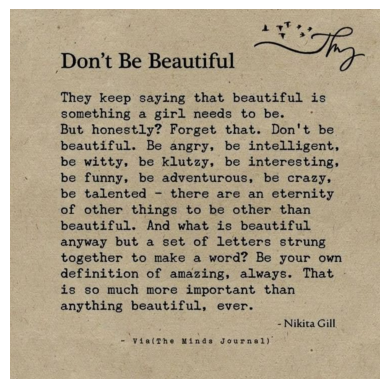

In [74]:
from PIL import Image
import matplotlib.pyplot as plt

# Replace with your uploaded image file path
image_path = '/kaggle/input/dataset1-jpg/ecb19cb0-c46b-4050-8356-7fe11be734d7.jpg'

# Open the image
image = Image.open(image_path)

# Display the image inline in the notebook using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()


In [80]:
extracted_text = pytesseract.image_to_string(image)

# Display the extracted text
print("📝 Extracted Diary Text:\n")
print(extracted_text)
response = model.generate_content(extracted_text)
result = response.text

📝 Extracted Diary Text:

F

Don’t Be Beautiful Tis,

They keep saying that beautiful is
something a girl needs to be.
But honestly? Forget that. Don't be
beautiful. Be angry, be intelligent,
be witty, be klutzy, be interesting,
be funny, be adventurous, be crazy,
be talented - there are an eternity
of other things to be other than
beautiful. And what is beautiful
anyway but a set of letters strung
together to make a word? Be your own
definition of amazing, always. That
is so much more important than
anything beautiful, ever.

- Nikita Gill

-‘yia(The Minds Journal)’



In [81]:
import google.generativeai as genai


# Initialize model
model = genai.GenerativeModel('gemini-1.5-pro-002')

# Define emoji mapper
emotion_emojis = {
    "sadness": "😞",
    "joy": "😊",
    "anger": "😠",
    "surprise": "😲",
    "neutral": "😐"
}




response = model.generate_content(extracted_text)
result = response.text


import re
match = re.search(r"(?i)dominant emotion.*?:\s*(\w+)", result)
emotion_label = match.group(1).lower() if match else "neutral"
emoji = emotion_emojis.get(emotion_label, "🙂")

# Display output with emoji
print("✨ AI Diary Response ✨\n")
print(result)
print(f"\n🧠 Emotion Emoji: {emoji}")


✨ AI Diary Response ✨

This is a powerful and inspiring poem by Nikita Gill. It challenges the societal pressure on girls and women to prioritize beauty above all else.  Here's a breakdown of what makes it effective:

* **Direct and Conversational Tone:** The poem speaks directly to the reader, using "you" and a conversational style, making it feel personal and relatable.
* **Rejection of Conventional Standards:**  It actively rejects the idea that beauty is a necessary or even desirable trait for girls, encouraging them to embrace other qualities.
* **List of Empowering Alternatives:** The poem provides a vibrant list of alternative characteristics, emphasizing intelligence, wit, humor, and adventurousness – traits that contribute to a well-rounded and fulfilling life.
* **Deconstruction of "Beautiful":**  By reducing "beautiful" to simply a collection of letters, Gill diminishes its perceived power and importance. This encourages readers to question the societal weight placed on this